In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
categorical_features=['gender' ,'hypertension',	'heart_disease'	,'ever_married',	'work_type',	'Residence_type'	,'smoking_status',	'stroke']
unique_values={i:df[i].unique() for i in categorical_features}

In [ ]:
for col,values in unique_values.items():
  print(f"{col}:{values}")

gender:['Male' 'Female' 'Other']
hypertension:[0 1]
heart_disease:[1 0]
ever_married:['Yes' 'No']
work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:['Urban' 'Rural']
smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke:[1 0]


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Here,in the above code we can see that bmi has 201 null values**

In [ ]:
y=df['stroke']
y.value_counts(normalize=True)*100

,proportion
stroke,
0,95.127202
1,4.872798


**We can see that after normalize the stroke counts it is highly imbalnced dataset**

In [ ]:
import plotly.express as px
px.bar(x=y.value_counts().index,y=y.value_counts(),color=y.value_counts().index)

In [ ]:
print("Statistical Summary:")
numerical_features=['age','avg_glucose_level','bmi']
df[numerical_features].describe()

Statistical Summary:


,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

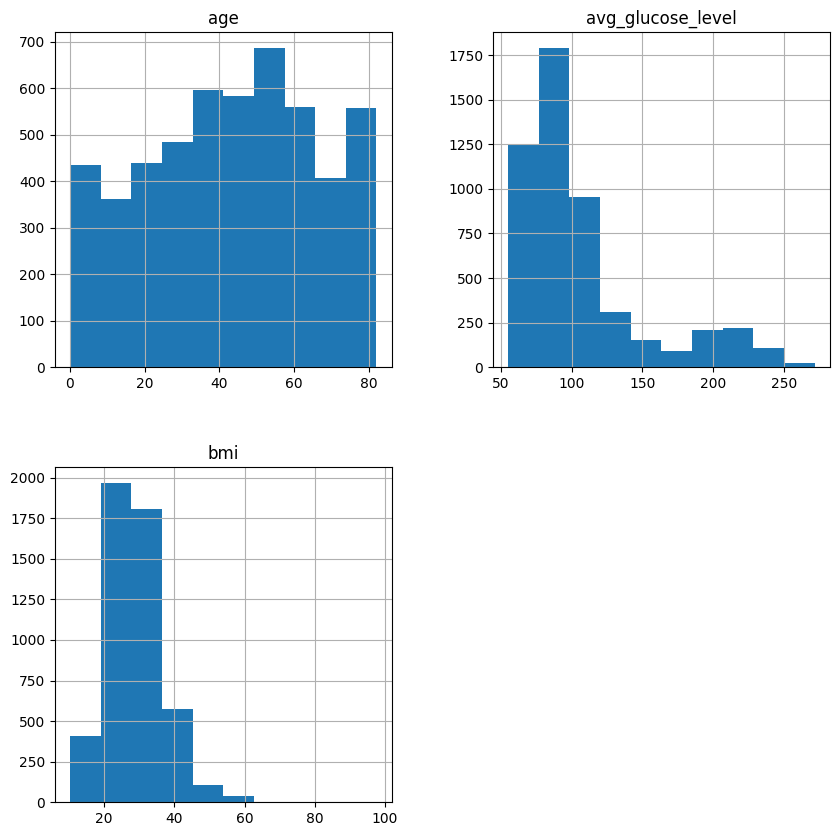

In [ ]:
df[numerical_features].hist(figsize=(10,10))

In [ ]:
fig=px.histogram(df,x='gender',width=400)
fig.show()

In [ ]:
stroke_gender=round(df.groupby('gender')['stroke'].mean(),3)*100
stroke_gender.sort_values(ascending=False)

,stroke
gender,
Male,5.1
Female,4.7
Other,0.0


In [ ]:
fig=px.histogram(df,x='hypertension',width=400)
fig.show()

In [ ]:
stroke_hypertension=round(df.groupby('hypertension')['stroke'].mean(),3)*100
stroke_hypertension.sort_values(ascending=False)

,stroke
hypertension,
1,13.3
0,4.0


In [ ]:
fig=px.histogram(df,x='heart_disease',width=400)
fig.show()

In [ ]:
stroke_heart_disease=round(df.groupby('heart_disease')['stroke'].mean(),3)*100
stroke_heart_disease.sort_values(ascending=False)

,stroke
heart_disease,
1,17.0
0,4.2


In [ ]:
fig=px.histogram(df,x='work_type',width=400)
fig.show()

In [ ]:
Stroke_per_work_type=df.groupby('work_type')['stroke'].mean()*100
Stroke_per_work_type.sort_values(ascending=False)

,stroke
work_type,
Self-employed,7.936508
Private,5.094017
Govt_job,5.022831
children,0.291121
Never_worked,0.000000


In [ ]:
fig=px.histogram(df,x='Residence_type',width=400)
fig.show()

In [ ]:
Stroke_per_residence_type=round(df.groupby('Residence_type')['stroke'].mean(),3)*100
Stroke_per_residence_type.sort_values(ascending=False)

,stroke
Residence_type,
Urban,5.2
Rural,4.5


In [ ]:
fig=px.histogram(df,x='smoking_status',width=400)
fig.show()

In [ ]:
Stroke_per_smoking_status=round(df.groupby('smoking_status')['stroke'].mean(),3)*100
Stroke_per_smoking_status.sort_values(ascending=False)

,stroke
smoking_status,
formerly smoked,7.9
smokes,5.3
never smoked,4.8
Unknown,3.0


In [ ]:
from sklearn.metrics import mutual_info_score
for i in categorical_features:
  mis=mutual_info_score(df[i],df['stroke'])
  print(f"{i}:{mis:.2f}")

gender:0.00
hypertension:0.01
heart_disease:0.01
ever_married:0.01
work_type:0.01
Residence_type:0.00
smoking_status:0.00
stroke:0.19


In [ ]:
df[numerical_features+['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


***Conclusions from above visualization***

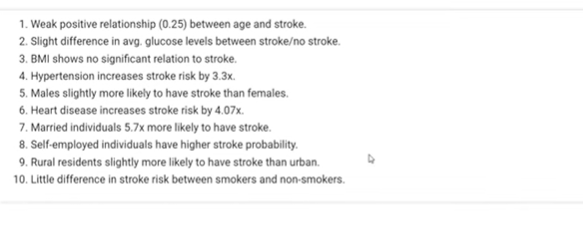

**Dealing with null values,imbalanced dataset,convert categorical to numerical,skewness,etc..**

***To deal with all this use encoder***

**Here in this we use Pipeline**

In [ ]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
numerical=['age',	'avg_glucose_level',	'bmi']
categorical=['hypertension',	'heart_disease'	,'ever_married'	,'work_type',	'Residence_type','smoking_status']


In [ ]:
transformer=ColumnTransformer(transformers=[
    ('num',Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('power',PowerTransformer(method='yeo-johnson',standardize=True))]),numerical),
     ('cat',OneHotEncoder(),categorical)
])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
def get_models():
  models,names=list(),list()
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LR')
  models.append(RandomForestClassifier(n_estimators=100))
  names.append('RF')
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  return models,names

In [ ]:
def evaluate(X,y,model):
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(model,X,y,scoring='roc_auc',cv=cv,n_jobs=-1)
  return scores

In [ ]:
y=df['stroke']
X=df.drop('stroke',axis=1)

In [ ]:
from imblearn.pipeline import Pipeline as IMBPipeline
models,names=get_models()
results=list()
for i in range(len(models)):
  # Dealing with imbalnced dataset
  IMBpipeline=IMBPipeline(steps=[('transformer',transformer),('smote',SMOTE()),('model',models[i])])
  scores=evaluate(X,y,IMBpipeline)
  results.append(scores)

  print(">%s: ROC-AUC= %.3f (%.3f)"% (names[i],np.mean(scores),np.std(scores)))

>LR: ROC-AUC= 0.837 (0.028)
>RF: ROC-AUC= 0.783 (0.037)
>LDA: ROC-AUC= 0.839 (0.028)


***Here we can see that LDA providing better results than other models and RFC is worst model***